In [22]:
from hfqco.calculator import nominal_ic, shunt_calc
print(nominal_ic(Ic=60.8*10**(-6), L=3.5*10**(-12)))

1.9175373305009014e-05


･ (Period to calculate initial phase)		=  1e-10  ~  4e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
Simulate with default values.
Using default parameters


100%|██████████| 2/2 [00:17<00:00,  8.61s/it]


,low(value),low(%),high(value),high(%)
R1,6.562500,-58.984375,32.0,100.0
BIAS,0.001953,-99.609375,1.0,100.0


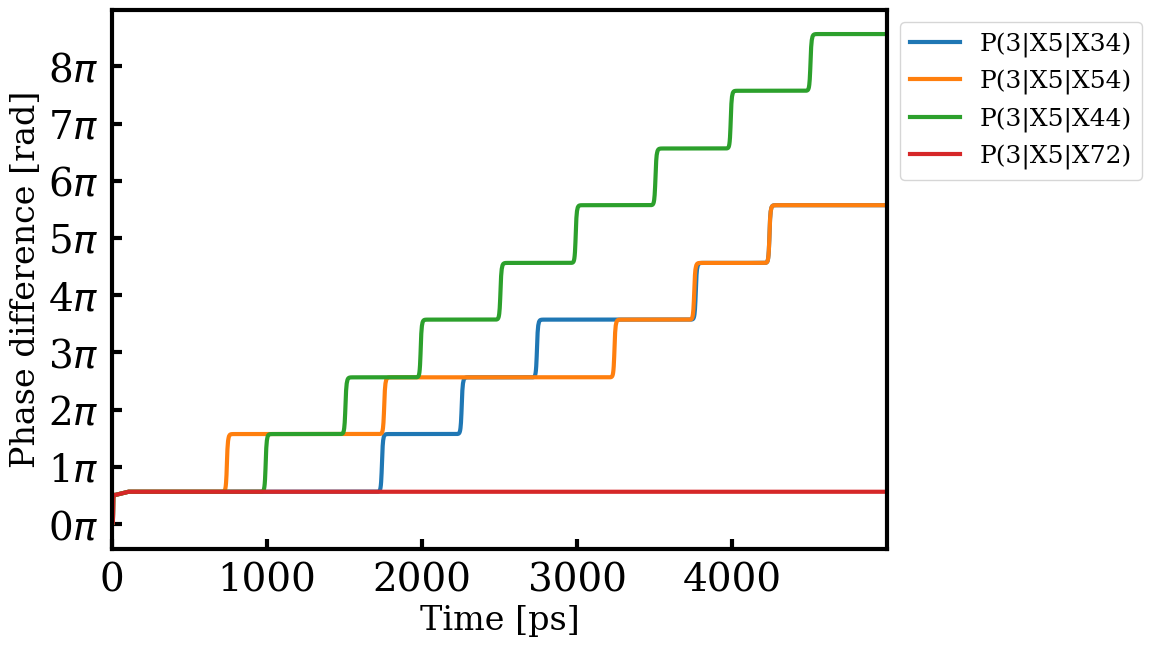

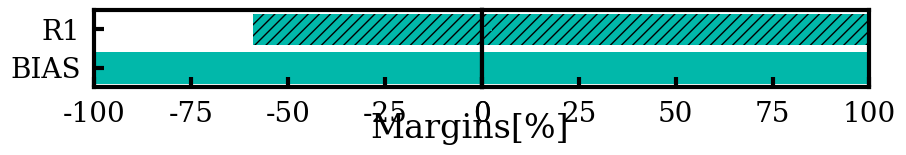

In [26]:
input = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

** + -------------------- +
** |     HFQJTL           |
** + -------------------- +
.subckt jtl_squid   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   20ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   20ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt jtl_base        1       5       100
L1                      1       2       1pH
L2                      2       3       4.2pH
L3                      3       4       8.4pH
L4                      4       5       3.2pH
X1      jtl_squid       3       0
X2      jtl_squid       4       0
R1                      2       100     34ohm
.ends

.subckt jtl_base8       1       9       100
X1      jtl_base        1       2       100
X2      jtl_base        2       3       100
X3      jtl_base        3       4       100
X4      jtl_base        4       5       100
X5      jtl_base        5       6       100
X6      jtl_base        6       7       100
X7      jtl_base        7       8       100
X8      jtl_base        8       9       100
.ends
** + ---------------------------------- +


** + -------------------- +
** |     AND_PAIR         |
** + -------------------- +
.subckt and_squid1   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   12.7ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   12.7ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid2   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.638
R1                  1       5   12.08ohm 
B2                  2       5   jjmod area=0.638
R2                  2       5   12.08ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid3   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.698
R1                  1       5   10.96ohm 
B2                  2       5   jjmod area=0.698
R2                  2       5   10.96ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid4   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=2
R1                  1       5   3.63ohm 
B2                  2       5   jjmod area=2
R2                  2       5   3.63ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid5   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.518
R1                  1       5   14.91ohm 
B2                  2       5   jjmod area=0.518
R2                  2       5   14.91ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid6   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=2.13
R1                  1       5   5.30ohm 
B2                  2       5   jjmod area=2.13
R2                  2       5   5.30ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid7   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   12.71ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   12.71ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

**                      in      clk     out      bias
.subckt and_pair        1       11       24      100
L1                      1       2       1pH
R1                      2       100     34ohm
L2                      2       3       4.2pH
X1      and_squid1      3       0
L3                      3       4       8.4pH
X2      and_squid2      4       0
L4                      4       5       2pH
R2                      5       100     29ohm
L5                      5       6       19pH
X3      and_squid3      6       0
L6                      6       7       1pH
L7                      7       8       1pH
X4      and_squid4      8       9
X5      and_squid5      9       10
L8                      10      11      2pH

L9                      7       21      6pH
X6      and_squid6      21      22
X7      and_squid7      22      23
L10                     23      24      1pH
.ends
** + ---------------------------------- +

** + -------------------- +
** |     AND              |
** + -------------------- +
.subckt and_squid10   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   12.71ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   12.71ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid11  3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   12.71ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   12.71ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid12  3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.672
R1                  1       5   11.5ohm 
B2                  2       5   jjmod area=0.672
R2                  2       5   11.5ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt and_squid13   3       5 
L1                  3       1   1.75pH fcheck
L2                  3       4   1.75pH fcheck
B1                  1       5   jjmod area=0.608
R1                  1       5   12.71ohm 
B2                  2       5   jjmod area=0.608
R2                  2       5   12.71ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends


***                 in1  in2 clk out bias
.subckt and         1    2   21  37  100
L21                      21      22       1pH
R21                      22      100      34ohm
L22                      22      23       4.2pH
X21      and_squid10     23      0
L23                      23      24       8.4pH
X22      and_squid11     24      0
L24                      24      25       3.2pH
X51       and_pair       1       25      31      100
X52       and_pair       2       25      31      100       

L31                      31      32       1pH
X31      and_squid12     32      0
L32                      32      33       1pH
R31                      33      100      #R1(16)ohm
L33                      33      34       4.2pH
X32      and_squid13     34      0
L34                      34      35       8.4pH
X33      and_squid13     35      0
L35                      35      36       3.2pH
.ends
** + ---------------------------------- +


*** top cell: 

Vin1                        31      0       PWL(0ps 0mV   1500ps 0mV 1501ps 0.517mV 1502ps 0.517mV 1503ps 0mV   2000ps 0mV 2001ps 0.517mV 2002ps 0.517mV 2003ps 0mV   2500ps 0mV 2501ps 0.517mV 2502ps 0.517mV 2503ps 0mV   3510ps 0mV 3511ps 0.517mV 3512ps 0.517mV 3513ps 0mV   4000ps 0mV 4001ps 0.517mV 4002ps 0.517mV 4003ps 0mV)
R31                         31      32                       1ohm
X31    jtl_base8            32      33      100
X32    jtl_base8            33      34      100
X33    jtl_base8            34      35      100
X34    jtl_base8            35      36      100

Vin2                        51      0       PWL(0ps 0mV   500ps 0mV 501ps 0.517mV 502ps 0.517mV 503ps 0mV   1500ps 0mV 1501ps 0.517mV 1502ps 0.517mV 1503ps 0mV   3000ps 0mV 3001ps 0.517mV 3002ps 0.517mV 3003ps 0mV   3500ps 0mV 3501ps 0.517mV 3502ps 0.517mV 3503ps 0mV   4000ps 0mV 4001ps 0.517mV 4002ps 0.517mV 4003ps 0mV)
R51                         51      52                       1ohm
X51    jtl_base8            52      53      100
X52    jtl_base8            53      54      100
X53    jtl_base8            54      55      100
X54    jtl_base8            55      56      100

Vinclk                      41      0       PWL(0ps 0mV   750ps 0mV 751ps 0.517mV 752ps 0.517mV 753ps 0mV   1250ps 0mV 1251ps 0.517mV 1252ps 0.517mV 1253ps 0mV   1750ps 0mV 1751ps 0.517mV 1752ps 0.517mV 1753ps 0mV   2250ps 0mV 2251ps 0.517mV 2252ps 0.517mV 2253ps 0mV   2750ps 0mV 2751ps 0.517mV 2752ps 0.517mV 2753ps 0mV   3250ps 0mV 3251ps 0.517mV 3252ps 0.517mV 3253ps 0mV   3750ps 0mV 3751ps 0.517mV 3752ps 0.517mV 3753ps 0mV   4250ps 0mV 4251ps 0.517mV 4252ps 0.517mV 4253ps 0mV)
R41                         41      42                       1ohm
X41    jtl_base8            42      43      100
X42    jtl_base8            43      44      100
X43    jtl_base8            44      45      100
X44    jtl_base8            45      46      100


X91     and            36  56  46  72  200


X71    jtl_base8            72      73      100
X72    jtl_base8            73      74      100
X73    jtl_base8            74      75      100
X74    jtl_base8            75      76      100
R72                         76      77                      8.32ohm
L71                         77      0                       2pH fcheck


Vb1                         100     0                       pwl(0ps 0mV 100ps 0.5mV)
Vb2                         200     0                       pwl(0ps 0mV 100ps 0.5mV)


*** jsim input file ***
.tran 1ps 5000ps 0ps 1ps

.print phase  3|X5|X34
.print phase  3|X5|X54
.print phase  3|X5|X44

.print phase  3|X5|X72

.end
"""
print(input)

# config_data = {
#     "avgcalc.start.time":100e-12,
#     "avgcalc.end.time":400e-12,
#     "pulse.delay":180e-12,
#     "pulse.interval": 500e-12,
#     "phase.ele": ["P(3|X5|X34)","P(3|X5|X44)","P(3|X5|X54)","P(3|X5|X72)"],
#     "voltage.ele" : [],
#     "allow.multi.swithes" : False
# }

# from hfqco import data, util, pyjosim, netlist

# from hfqco.pyjosim import simulation
# from hfqco.graph import sim_plot
# import importlib
# importlib.reload(data)
# importlib.reload(util)
# importlib.reload(netlist)



# # df = simulation(input)
# # sim_plot(df)

# inp_df = util.create_inp_df("SQUID3", 0.608, 0.788, 0.01)
# d = netlist.Netlist(input, config_data)
# d.get_margins()
# #d.custom_simulation(inp_df)
# #inp_df.to_csv("and10_pre.csv")

# # d = data.Data(netlist_and, config_data)
# # d.get_base_switch_timing()
# # d.get_margins()